In [148]:
# Necessary imports
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
from shapely.geometry import Point
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [149]:
# Read geometric data of Polish map
polska_powiaty : pd.DataFrame = gpd.read_file('powiaty-medium.geojson')
polska_powiaty.head()

,id,nazwa,geometry
0,1,powiat ropczycko-sędziszowski,"POLYGON ((21.80340 50.15140, 21.80300 50.15010..."
1,2,powiat łosicki,"POLYGON ((22.71870 52.33400, 22.72030 52.33430..."
2,3,powiat piaseczyński,"POLYGON ((21.16500 52.14470, 21.17110 52.13760..."
3,4,powiat radomski,"POLYGON ((21.20550 51.58870, 21.20500 51.58840..."
4,5,powiat sierpecki,"POLYGON ((19.44470 52.93900, 19.44500 52.93940..."


In [150]:
# Read data
wynagrodzenia = pd.read_csv('WYNAGRODZENIE.csv', delimiter=';')
proper_keys = list(wynagrodzenia.keys()[2:])
avg_place = []
avg_place_powiaty = [0 for _ in range(len(list(polska_powiaty['id'])))]
indexes = []

# Calculate average wage for all the years
for i in range(len(wynagrodzenia[proper_keys[0]])):
    avg_place.append(round(mean([wynagrodzenia[key][i] for key in proper_keys]), 2))

# Push new colmn to data_struct
wynagrodzenia['avg_wynagrodzenia'] = avg_place

powiaty_merged = polska_powiaty.merge(wynagrodzenia, 'left', left_on='nazwa', right_on='Nazwa', suffixes=(False, False))
powiaty_merged.head()

,id,nazwa,geometry,Kod,Nazwa,ogółem;2002;[zł],ogółem;2003;[zł],ogółem;2004;[zł],ogółem;2005;[zł],ogółem;2006;[zł],...,ogółem;2014;[zł],ogółem;2015;[zł],ogółem;2016;[zł],ogółem;2017;[zł],ogółem;2018;[zł],ogółem;2019;[zł],ogółem;2020;[zł],ogółem;2021;[zł],ogółem;2022;[zł],avg_wynagrodzenia
0,1,powiat ropczycko-sędziszowski,"POLYGON ((21.80340 50.15140, 21.80300 50.15010...",1815000,powiat ropczycko-sędziszowski,1811.48,1856.52,1915.39,2002.16,2069.70,...,3236.75,3365.62,3472.89,3675.99,3898.22,4216.57,4401.73,4730.10,5343.80,3095.79
1,2,powiat łosicki,"POLYGON ((22.71870 52.33400, 22.72030 52.33430...",1410000,powiat łosicki,1792.75,1836.42,1964.15,2008.38,2094.12,...,3280.27,3373.06,3369.26,3638.32,3800.57,3991.20,4486.10,4853.59,5362.58,3096.69
2,3,powiat piaseczyński,"POLYGON ((21.16500 52.14470, 21.17110 52.13760...",1418000,powiat piaseczyński,2503.34,2676.03,2583.65,2749.00,2811.32,...,4118.49,4030.78,4149.91,4102.07,4739.75,5120.47,5164.71,5664.70,6499.96,3884.60
3,4,powiat radomski,"POLYGON ((21.20550 51.58870, 21.20500 51.58840...",1425000,powiat radomski,1635.89,1717.44,1716.71,1764.95,1836.62,...,3062.57,3130.03,3276.95,3477.49,3687.64,4018.68,4362.35,4859.10,5412.43,2945.13
4,5,powiat sierpecki,"POLYGON ((19.44470 52.93900, 19.44500 52.93940...",1427000,powiat sierpecki,1992.31,1929.50,1928.86,2022.79,2002.15,...,3184.66,3253.31,3393.19,3716.02,3980.58,4163.16,4613.59,4886.81,5505.06,3131.13


<GeoAxes: >

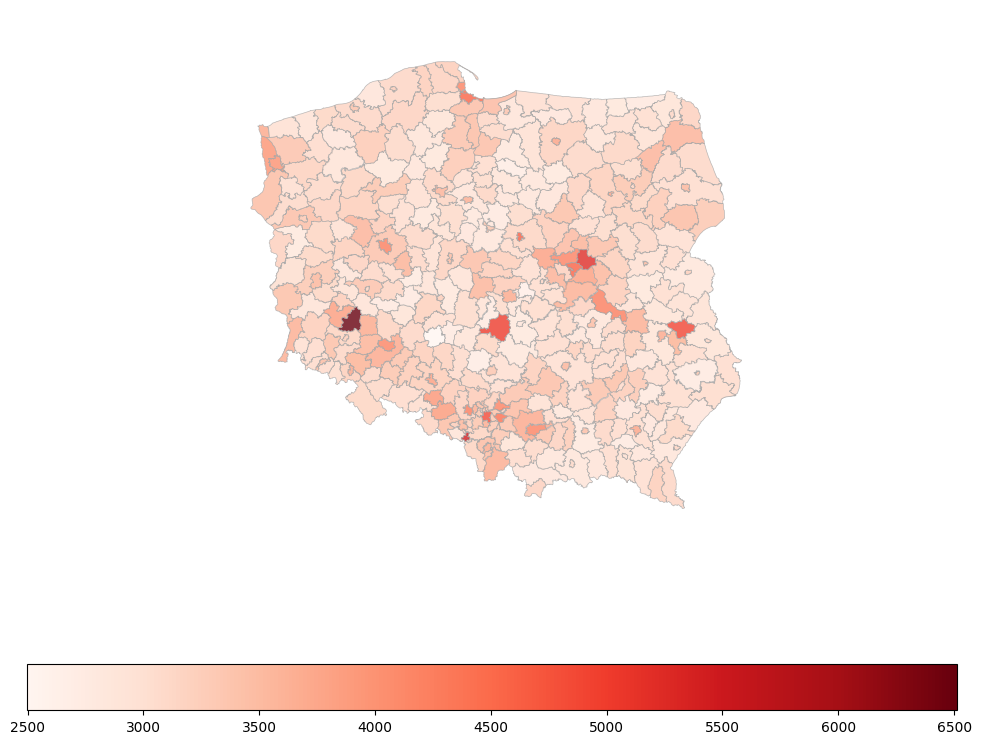

In [151]:
# Create heatmap (chloropleth)
geoplot.choropleth(powiaty_merged,
                    hue="avg_wynagrodzenia",
                    edgecolor="darkgrey",
                    linewidth=.5,
                    cmap="Reds",
                    alpha=0.8,
                    projection=gcrs.AlbersEqualArea(),
                    legend=True,
                    legend_kwargs={'orientation': 'horizontal'},
                    figsize=(12, 10))

In [152]:
# Read geometric data of world's map
world_data : pd.DataFrame = gpd.read_file('countries.geojson')
world_data.head()

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."


In [153]:
# Read earthquakes data with longitude / latitude / Point()
earthquakes : pd.DataFrame = gpd.read_file('all_month.geojson')

In [154]:
earthquakes_csv = pd.read_csv('earthquakes.csv', delimiter=',')
earthquakes_csv.head()

# Create Point() structure required for point-plot from longitude & latitude columns
points = [Point(lon, lat) for lon, lat in zip(earthquakes_csv["location.longitude"], earthquakes_csv["location.latitude"])]

earthquakes_csv["geometry"] = points

earthquakes_csv = gpd.GeoDataFrame(earthquakes_csv)

earthquakes_csv.head()

,id,impact.gap,impact.magnitude,impact.significance,location.depth,location.distance,location.full,location.latitude,location.longitude,location.name,time.day,time.epoch,time.full,time.hour,time.minute,time.month,time.second,time.year,geometry
0,nc72666881,122.00,1.43,31,15.12,0.10340,"13km E of Livermore, California",37.672333,-121.619000,California,27,1469593183550,2016-07-27 00:19:43,0,19,7,43,2016,POINT (-121.61900 37.67233)
1,us20006i0y,30.00,4.90,371,97.07,1.43900,"58km WNW of Pakokku, Burma",21.514600,94.572100,Burma,27,1469593228220,2016-07-27 00:20:28,0,20,7,28,2016,POINT (94.57210 21.51460)
2,nc72666891,249.00,0.06,0,4.39,0.02743,"12km SE of Mammoth Lakes, California",37.576500,-118.859167,California,27,1469593897150,2016-07-27 00:31:37,0,31,7,37,2016,POINT (-118.85917 37.57650)
3,nc72666896,122.00,0.40,2,1.09,0.02699,"6km SSW of Mammoth Lakes, California",37.595833,-118.994833,California,27,1469594144150,2016-07-27 00:35:44,0,35,7,44,2016,POINT (-118.99483 37.59583)
4,nn00553447,113.61,0.30,1,7.60,0.06300,"16km SSE of Mogul, Nevada",39.377500,-119.845000,Nevada,27,1469594519667,2016-07-27 00:41:59,0,41,7,59,2016,POINT (-119.84500 39.37750)


c:\Users\matip\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\mpl\geoaxes.py:872: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.set_ylim([y1, y2])


<GeoAxes: >

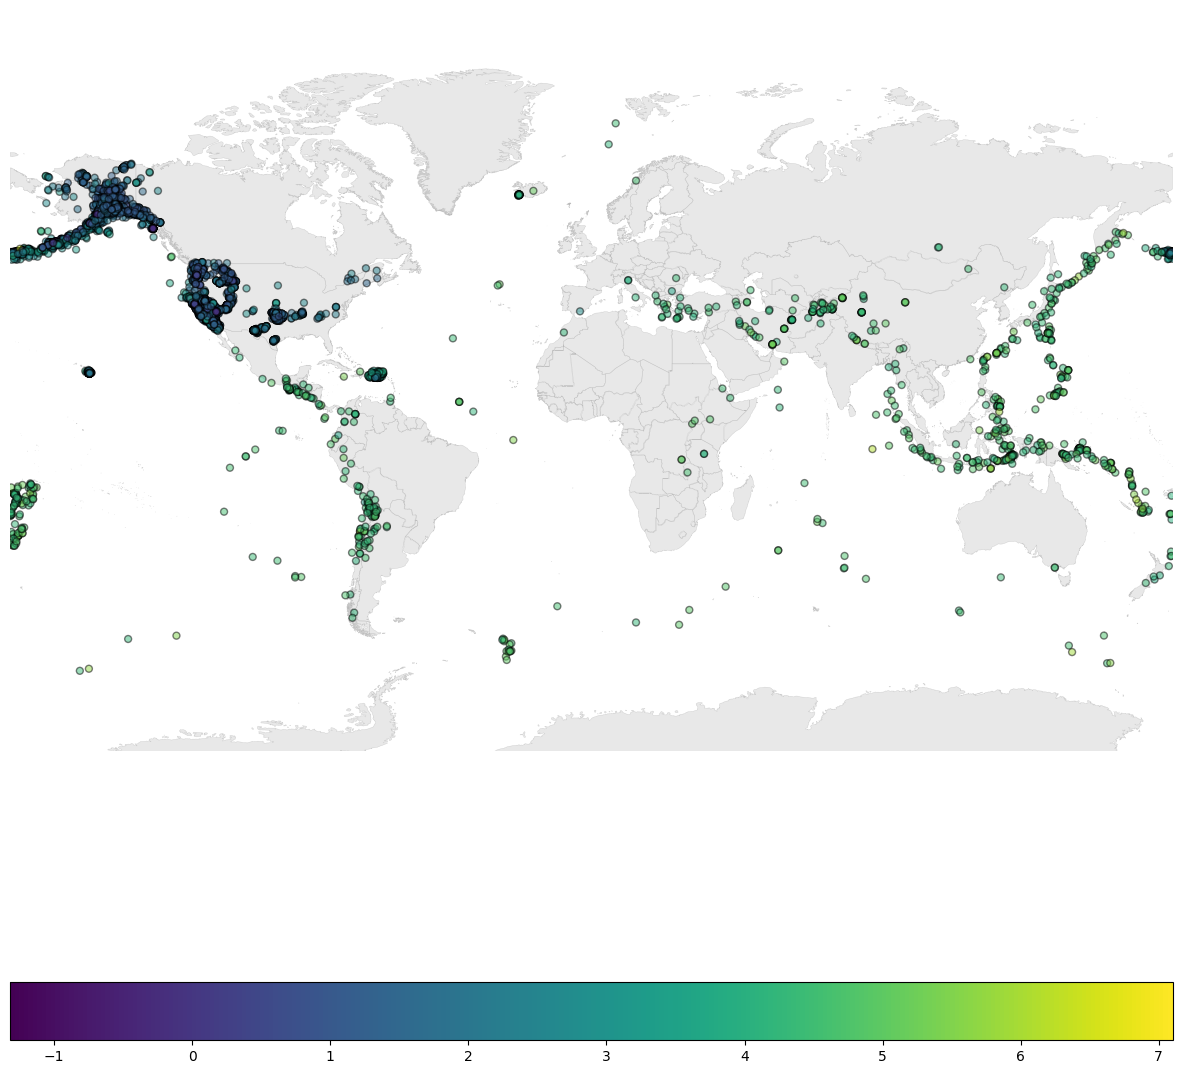

In [155]:
# Projection 
# Miller is best for big areas (e.x. whole world)
# AlbersEqualArea best for small areas (like one country)

axes = geoplot.polyplot(world_data, projection=geoplot.crs.Miller(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3, alpha=0.5, figsize=(15, 20)) # projection=geoplot.crs.AlbersEqualArea(), Miller()
scale_labels = ['< 1 MAG','1-2 MAG','2-3 MAG','3-4 MAG','4-5 MAG','5-6 MAG','> 6 MAG']
scale_values = [0,1,2,3,4,5,6]

geoplot.pointplot(earthquakes,
                  ax=axes,
                  hue='mag',
                  legend=True,
                  edgecolor='black',
                  legend_kwargs={'orientation': 'horizontal'},
                  alpha=0.5)


c:\Users\matip\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\mpl\geoaxes.py:872: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.set_ylim([y1, y2])


<GeoAxes: >

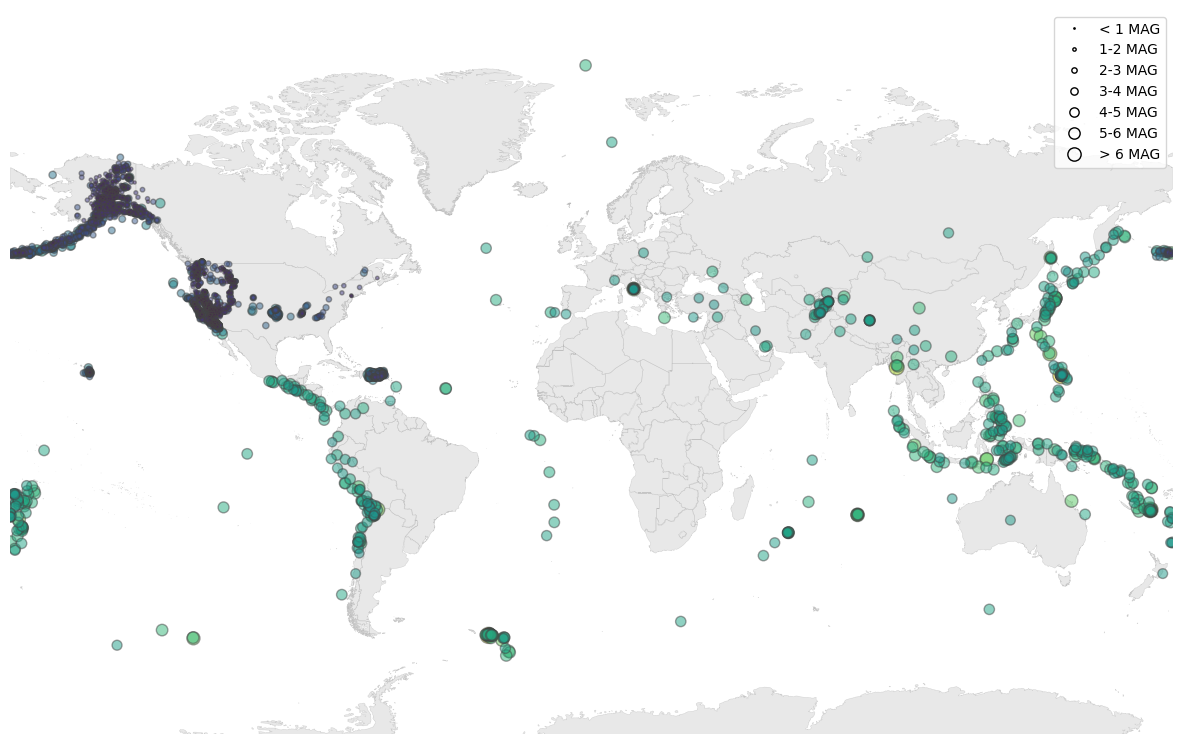

In [156]:
axes = geoplot.polyplot(world_data, projection=geoplot.crs.Miller(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3, alpha=0.5, figsize=(15, 20))

geoplot.pointplot(earthquakes_csv,
                  ax=axes,
                  hue='impact.magnitude',
                  scale='impact.magnitude',
                  legend=True,
                  legend_var='scale',
                  legend_labels=scale_labels,
                  legend_values=scale_values,
                  limits=(1, 12),
                  edgecolor='#444',
                  alpha=0.5)

In [157]:
# Read data with voting results
voting_res = pd.read_csv('wyniki_sejm_powiaty.csv', delimiter=';')
voting_res = voting_res.iloc[:, [0, 1, 29, 30, 31, 32, 33, 34, 35]]
voting_res.columns = ['TERYT', 'Powiat', 'Samorządowcy', '3. droga', 'Lewica', 'PiS', 'Konfederacja', 'KO', 'PJJ']
parties = ['Samorządowcy', '3. droga', 'Lewica', 'PiS', 'Konfederacja', 'KO', 'PJJ']
voting_res.head()

,TERYT,Powiat,Samorządowcy,3. droga,Lewica,PiS,Konfederacja,KO,PJJ
0,20100,powiat bolesławiecki,1903,5339,4146,15465,3425,14329,872
1,20200,powiat dzierżoniowski,869,6041,3797,17865,3582,16811,902
2,20300,powiat głogowski,961,4417,4120,17212,2851,16434,609
3,20400,powiat górowski,706,2031,1623,6478,1123,3888,243
4,20500,powiat jaworski,644,2796,2507,10139,1529,7250,275


In [158]:
best_vote = []
voting_keys = list(voting_res.keys())

# Create new vector of the highest votes number and push to data_struct
for i in range(len(voting_res[voting_keys[0]])):
    for ind, key in enumerate(voting_keys[2:]):
        if voting_res[key][i] == max([voting_res[k][i] for k in voting_keys[2:]]):
            best_vote.append(key)

voting_res['best_vote'] = best_vote
voting_res = gpd.GeoDataFrame(voting_res)

In [159]:
# Merge two data_frames to have one variable with all required data
votes_merged = polska_powiaty.merge(voting_res, 'left', left_on='nazwa', right_on='Powiat', suffixes=(False, False))

votes_merged.head()


,id,nazwa,geometry,TERYT,Powiat,Samorządowcy,3. droga,Lewica,PiS,Konfederacja,KO,PJJ,best_vote
0,1,powiat ropczycko-sędziszowski,"POLYGON ((21.80340 50.15140, 21.80300 50.15010...",181500,powiat ropczycko-sędziszowski,500,4558,1395,24492,4130,3959,903,PiS
1,2,powiat łosicki,"POLYGON ((22.71870 52.33400, 22.72030 52.33430...",141000,powiat łosicki,208,2572,743,9159,1470,1594,335,PiS
2,3,powiat piaseczyński,"POLYGON ((21.16500 52.14470, 21.17110 52.13760...",141800,powiat piaseczyński,2300,18794,9401,32813,8250,49402,1839,KO
3,4,powiat radomski,"POLYGON ((21.20550 51.58870, 21.20500 51.58840...",142500,powiat radomski,1735,9869,3612,45814,6682,13540,1402,PiS
4,5,powiat sierpecki,"POLYGON ((19.44470 52.93900, 19.44500 52.93940...",142700,powiat sierpecki,473,4906,1419,12812,1727,3965,317,PiS


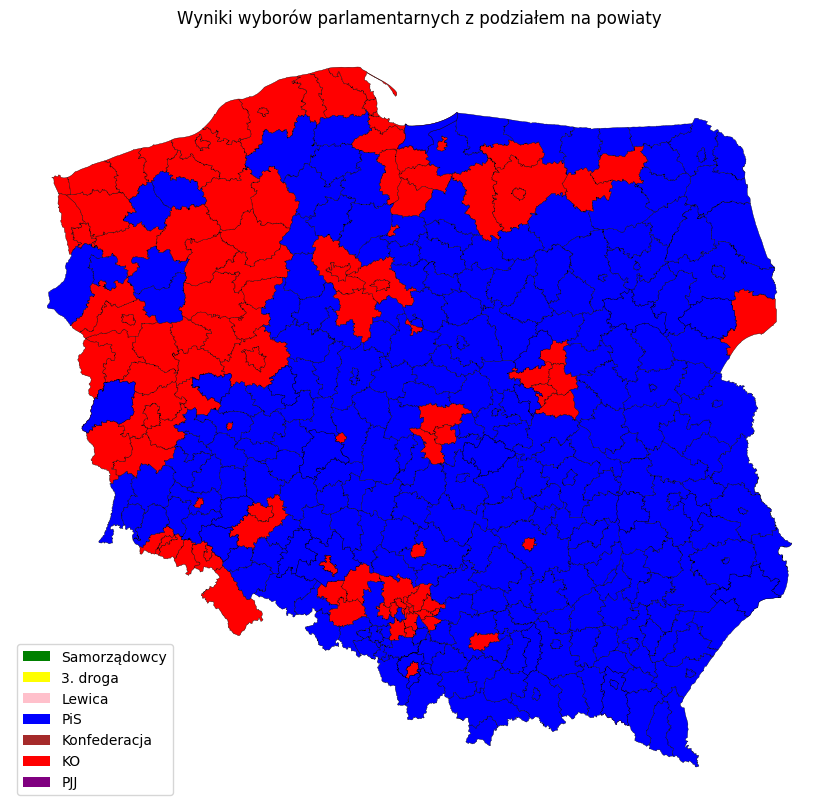

In [160]:
# Custom colors for every possible outcome
votes_colors = {
    'Samorządowcy' : "green",
    '3. droga' : "yellow",
    'Lewica' : "pink",
    'PiS' : "blue",
    'Konfederacja' : "brown",
    'KO': "red",
    'PJJ' : "purple"
}
# Have to create special patches for legend because GeoDataFrame.plot() doesn't support legend handles
patches = [mpatches.Patch(facecolor=value, label=key) for key, value in votes_colors.items()]

fig, ax = plt.subplots(figsize=(12,10))

# Group by every unique value in column and create geo_plot
for ctype, data in votes_merged.groupby('best_vote'):
    data.plot(ax=ax,
              color=votes_colors[ctype],
              edgecolor='#000',
              linewidth=0.25,
              label=ctype,
              legend=True)
    
ax.set(title='Wyniki wyborów parlamentarnych z podziałem na powiaty')
ax.set_axis_off()

ax.legend(loc='lower left', frameon=True, handles=patches)

plt.show()